<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceApplicationsInComputerVision/blob/main/Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to R for Data Science**
R is a widely used language in data science, known for its robust capabilities in statistical analysis, data visualization, and machine learning. Initially designed for statistical calculations, the language has grown into a powerful platform that offers versatile tools for manipulating large data sets, as well as a rich collection of libraries and packages, such as dplyr, tidyr, and ggplot2.

In [1]:
# Installing rpy2, which makes it possible to run R on Colab:
!pip install -q rpy2

# Loading the extension to use R:
%load_ext rpy2.ipython

In [2]:
%%R
# Loading the packages:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
%%R
# Importing a dataset from a link and displaying its first rows:
url <- 'https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv'
data <- read_csv(url)
print(head(data))

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
dbl (3): 1958, 1959, 1960

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 4
  Month `1958` `1959` `1960`
  <chr>  <dbl>  <dbl>  <dbl>
1 JAN      340    360    417
2 FEB      318    342    391
3 MAR      362    406    419
4 APR      348    396    461
5 MAY      363    420    472
6 JUN      435    472    535


In [4]:
%%R
# Manipulating the dataset by creating a new column with the average of passengers and displaying the dataset after the change:
data <- data %>%
  mutate(Average_Passengers = rowMeans(select(., -Month)))
print(data)

# A tibble: 12 × 5
   Month `1958` `1959` `1960` Average_Passengers
   <chr>  <dbl>  <dbl>  <dbl>              <dbl>
 1 JAN      340    360    417               372.
 2 FEB      318    342    391               350.
 3 MAR      362    406    419               396.
 4 APR      348    396    461               402.
 5 MAY      363    420    472               418.
 6 JUN      435    472    535               481.
 7 JUL      491    548    622               554.
 8 AUG      505    559    606               557.
 9 SEP      404    463    508               458.
10 OCT      359    407    461               409 
11 NOV      310    362    390               354 
12 DEC      337    405    432               391.


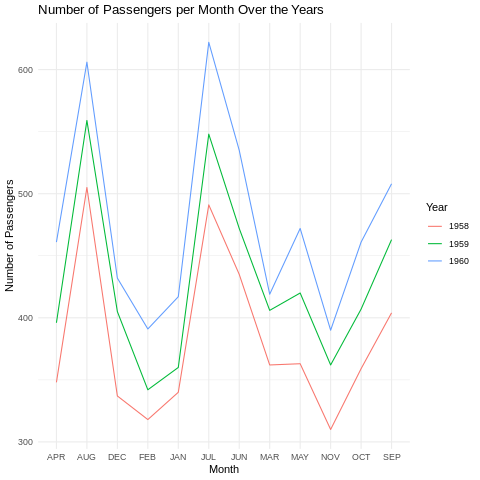

In [5]:
%%R
# Simple data visualization after the data was grouped correctly:
data_long <- data %>%
  pivot_longer(cols = c('1958', '1959', '1960'), names_to='Year', values_to= 'Passengers')
ggplot(data_long, aes(x = Month, y = Passengers, group = Year, color = Year)) +
  geom_line() +
  labs(title='Number of Passengers per Month Over the Years', x = "Month", y = 'Number of Passengers') +
  theme_minimal()